# Multi-Model Sensitivity Analysis

This notebook performs Root Cause Analysis on the top detected anomalies for all three sequentially trained models.

**Methods Used:**
- **Transformer + OC-SVM**: Uses **Occlusion (Feature Ablation)**. Since OC-SVM is not differentiable, we mask features one by one or by group (**Grouped Occlusion**) to measure their impact on the anomaly score.
- **PRAE & PNN**: Uses **Integrated Gradients (IG)**. These are fully differentiable neural networks, allowing us to compute exact feature attribution gradients.

**Objectives:**
1. Iterate through `transformer_ocsvm`, `prae`, and `pnn`.
2. Detect the most severe anomaly on the Test Day (Day 25).
3. Compute feature importance.
4. Visualize results (Global Importance Bars & Temporal Heatmaps where applicable).

In [13]:
import os
import json
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import sys
sys.path.append("..")

from PDMM import preprocessing as prep
from PDMM import machine_learning as ml
from PDMM import visualization as viz
from PDMM.pipeline import AnomalyDetectionPipeline, load_model, LazySequenceDataset, FlattenWrapper

In [ ]:
# Configuration
DATASET = 'TOTF'
SCALER = 'box-cox'
DATA_DIR = '../data/TOTF.PA-book'
MODEL_DIR = '../models'
TEST_DAY_INDEX = 24  # Day 25, 0 indexed
SEQ_LENGTH = 25
FEATURE_SETS = ['base', 'tao', 'poutre', 'hawkes', 'ofi']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}")

Running on cuda


In [15]:
# We will analyze all three sequential models
MODELS_TO_ANALYZE = ['transformer_ocsvm', 'prae', 'pnn']

# Number of top anomalies to analyze
TOP_N = 1000

# Grouped Occlusion Settings (for transformer_ocsvm only)
# Options: 'side', 'level', 'type', 'side_level', 'side_type', 'level_type', 'side_level_type'
GROUP_BY_OPTIONS = ['side', 'level', 'type']
USE_GROUPED_OCCLUSION = True

## 2. Load Data & Iterate Models

In [16]:
# Pre-load test data once
files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith(('.csv', '.csv.gz'))])
test_file = files[TEST_DAY_INDEX]
print(f"Loading Test Data: {test_file}")

data_pipeline = AnomalyDetectionPipeline()
data_pipeline.load_data(os.path.join(DATA_DIR, test_file))
data_pipeline.engineer_features(FEATURE_SETS)
base_features = data_pipeline.processed_df.copy()

print("Data loaded.")

Loading Test Data: 2015-01-09-TOTF.PA-book.csv.gz
Pipeline initialized on device: cuda
Loading data from ../data/TOTF.PA-book\2015-01-09-TOTF.PA-book.csv.gz...
Successfully loaded 1278519 rows.
Engineering features: ['base', 'tao', 'poutre', 'hawkes', 'ofi']...
Feature Engineering complete. Total features: 131
Data loaded.


Starting Analysis Loop...

Analyzing Model: transformer_ocsvm
Pipeline initialized on device: cuda
Examining Top 1000 Anomalies.
Score Range: 2.7720 - 2.7726
Anomaly 1/1000: Feature Occlusion
Anomaly 2/1000: Feature Occlusion
Anomaly 3/1000: Feature Occlusion
Anomaly 4/1000: Feature Occlusion
Anomaly 5/1000: Feature Occlusion
Anomaly 6/1000: Feature Occlusion
Anomaly 7/1000: Feature Occlusion
Anomaly 8/1000: Feature Occlusion
Anomaly 9/1000: Feature Occlusion
Anomaly 10/1000: Feature Occlusion
Anomaly 11/1000: Feature Occlusion
Anomaly 12/1000: Feature Occlusion
Anomaly 13/1000: Feature Occlusion
Anomaly 14/1000: Feature Occlusion
Anomaly 15/1000: Feature Occlusion
Anomaly 16/1000: Feature Occlusion
Anomaly 17/1000: Feature Occlusion
Anomaly 18/1000: Feature Occlusion
Anomaly 19/1000: Feature Occlusion
Anomaly 20/1000: Feature Occlusion
Anomaly 21/1000: Feature Occlusion
Anomaly 22/1000: Feature Occlusion
Anomaly 23/1000: Feature Occlusion
Anomaly 24/1000: Feature Occlusion
Anomaly 25/

c:\Users\adoni\Desktop\Projet MDS\MDS-Market_Manipulation\notebooks\..\PDMM\visualization.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Importance', y='Feature', palette='viridis')


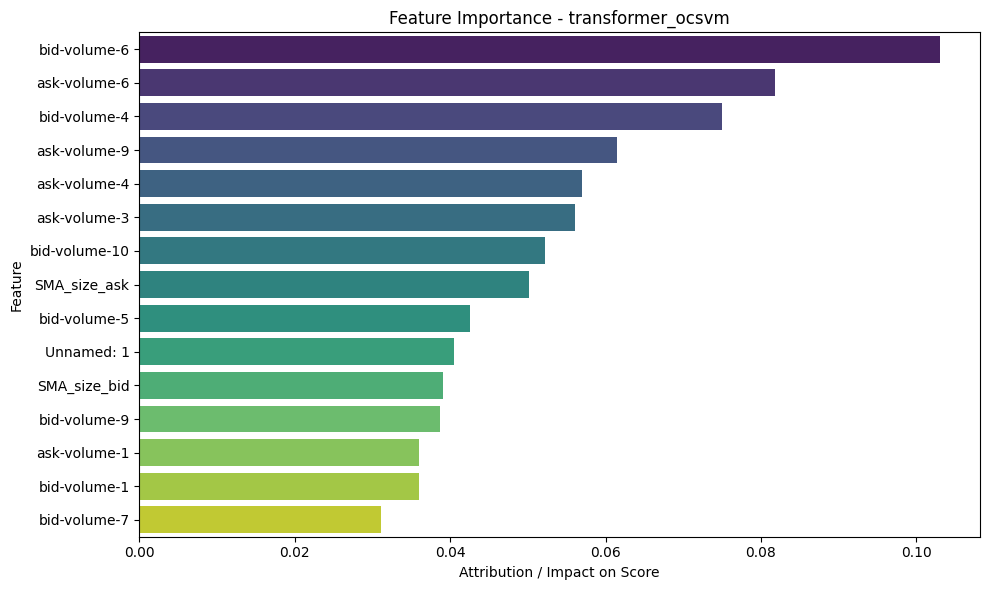

Grouped Feature Occlusion Results
Grouped by 'side':
  Group  Importance
neutral   -0.000070
    bid   -0.000074
    ask   -0.000093


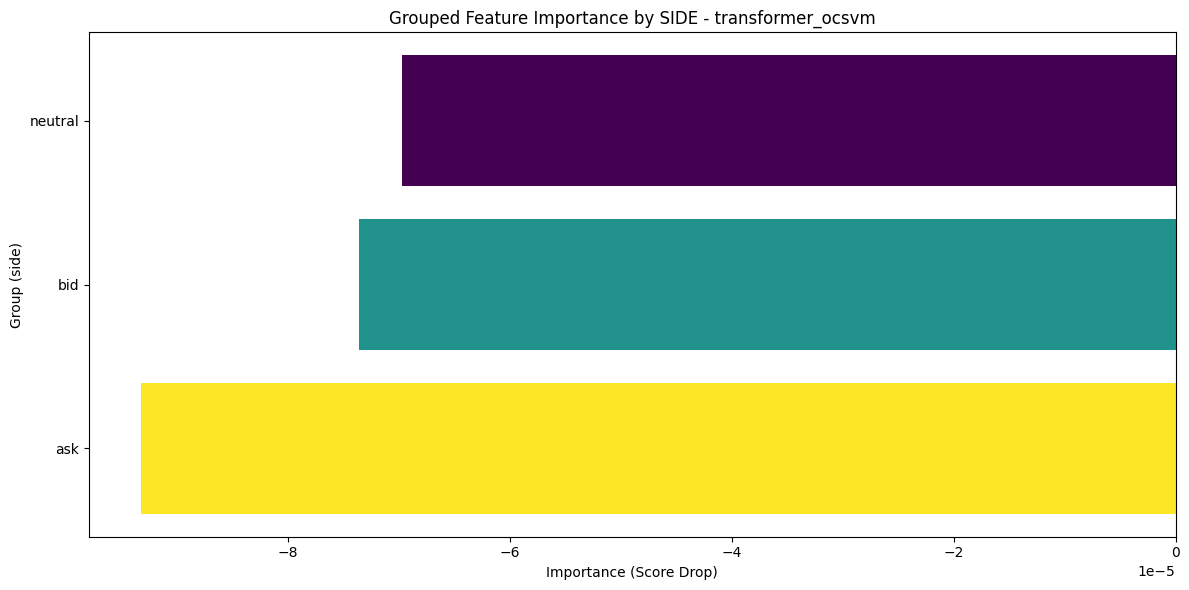

Grouped by 'level':
   Group    Importance
 level_5  4.208364e-06
 level_4 -3.896384e-07
 level_9 -2.471046e-06
 level_6 -3.671993e-06
 level_8 -4.290307e-06
 level_7 -6.610897e-06
level_10 -6.810580e-06
 level_3 -7.456536e-06
 level_2 -1.137934e-05
 level_1 -2.600300e-05
no_level -1.760034e-04


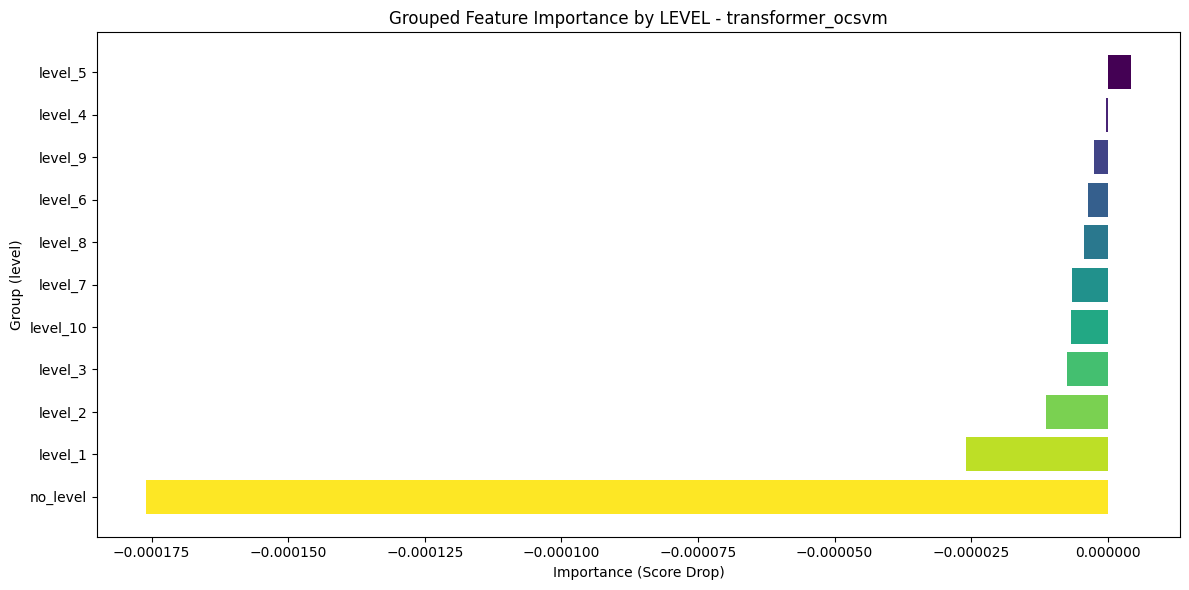

Grouped by 'type':
     Group    Importance
lob_volume  1.147588e-07
 imbalance  3.861474e-08
      flow -6.734380e-09
deep_order -3.422480e-08
volatility -4.468319e-08
       sma -6.144815e-08
     depth -2.961589e-07
     other -3.194117e-07
     slope -9.623176e-07
    spread -1.083545e-06
    cancel -1.473543e-06
     sweep -1.531244e-06
     speed -4.669408e-06
  dynamics -7.947292e-06
 mid_price -1.134430e-05
      time -1.422516e-05
    return -1.909490e-05
    hawkes -2.040677e-05
 lob_price -3.516033e-05
       ofi -4.215315e-05
     trade -9.563540e-05


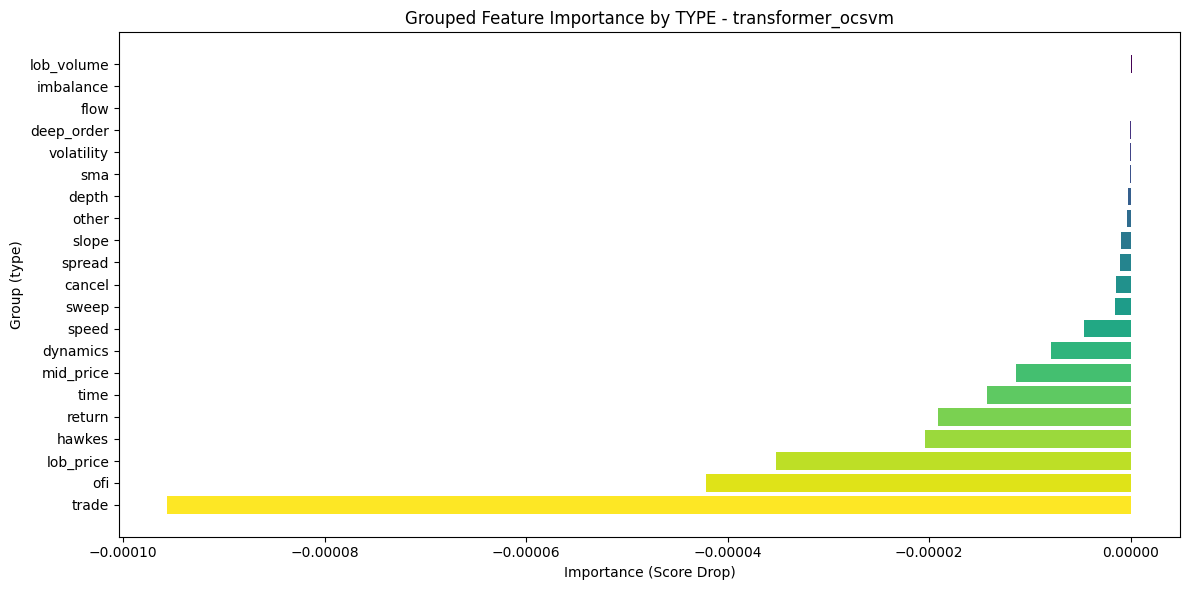



Analyzing Model: prae
Pipeline initialized on device: cuda
Examining Top 1000 Anomalies.
Score Range: 247743.1250 - 256626.5312
Anomaly 1/1000: Integrated Gradients
Anomaly 2/1000: Integrated Gradients
Anomaly 3/1000: Integrated Gradients
Anomaly 4/1000: Integrated Gradients
Anomaly 5/1000: Integrated Gradients
Anomaly 6/1000: Integrated Gradients
Anomaly 7/1000: Integrated Gradients
Anomaly 8/1000: Integrated Gradients
Anomaly 9/1000: Integrated Gradients
Anomaly 10/1000: Integrated Gradients
Anomaly 11/1000: Integrated Gradients
Anomaly 12/1000: Integrated Gradients
Anomaly 13/1000: Integrated Gradients
Anomaly 14/1000: Integrated Gradients
Anomaly 15/1000: Integrated Gradients
Anomaly 16/1000: Integrated Gradients
Anomaly 17/1000: Integrated Gradients
Anomaly 18/1000: Integrated Gradients
Anomaly 19/1000: Integrated Gradients
Anomaly 20/1000: Integrated Gradients
Anomaly 21/1000: Integrated Gradients
Anomaly 22/1000: Integrated Gradients
Anomaly 23/1000: Integrated Gradients
Anoma

c:\Users\adoni\Desktop\Projet MDS\MDS-Market_Manipulation\notebooks\..\PDMM\visualization.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Importance', y='Feature', palette='viridis')


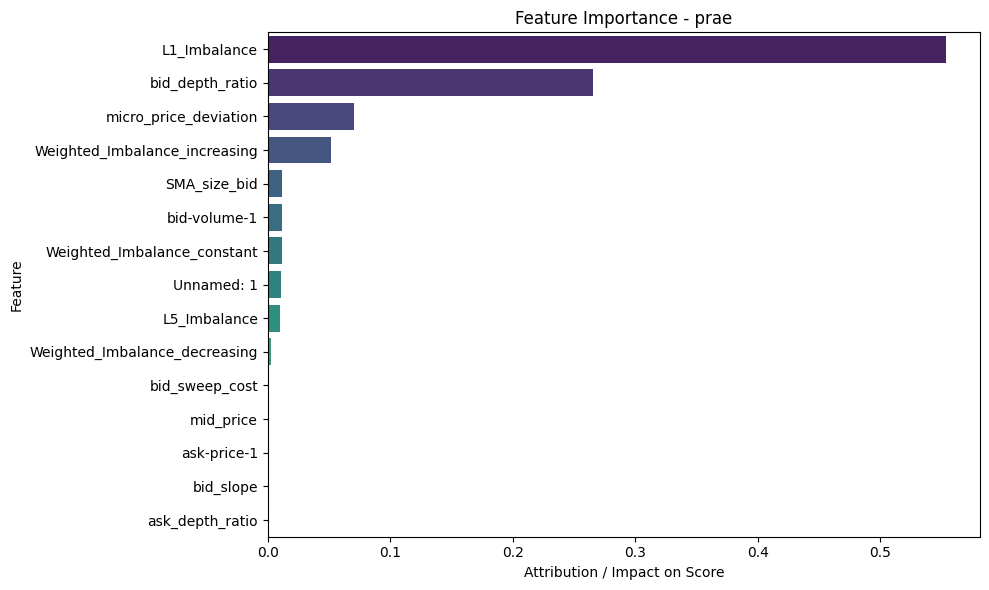



Analyzing Model: pnn
Pipeline initialized on device: cuda
Examining Top 1000 Anomalies.
Score Range: 27.8603 - 39.4950
Anomaly 1/1000: Integrated Gradients
Anomaly 2/1000: Integrated Gradients
Anomaly 3/1000: Integrated Gradients
Anomaly 4/1000: Integrated Gradients
Anomaly 5/1000: Integrated Gradients
Anomaly 6/1000: Integrated Gradients
Anomaly 7/1000: Integrated Gradients
Anomaly 8/1000: Integrated Gradients
Anomaly 9/1000: Integrated Gradients
Anomaly 10/1000: Integrated Gradients
Anomaly 11/1000: Integrated Gradients
Anomaly 12/1000: Integrated Gradients
Anomaly 13/1000: Integrated Gradients
Anomaly 14/1000: Integrated Gradients
Anomaly 15/1000: Integrated Gradients
Anomaly 16/1000: Integrated Gradients
Anomaly 17/1000: Integrated Gradients
Anomaly 18/1000: Integrated Gradients
Anomaly 19/1000: Integrated Gradients
Anomaly 20/1000: Integrated Gradients
Anomaly 21/1000: Integrated Gradients
Anomaly 22/1000: Integrated Gradients
Anomaly 23/1000: Integrated Gradients
Anomaly 24/100

c:\Users\adoni\Desktop\Projet MDS\MDS-Market_Manipulation\notebooks\..\PDMM\visualization.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Importance', y='Feature', palette='viridis')


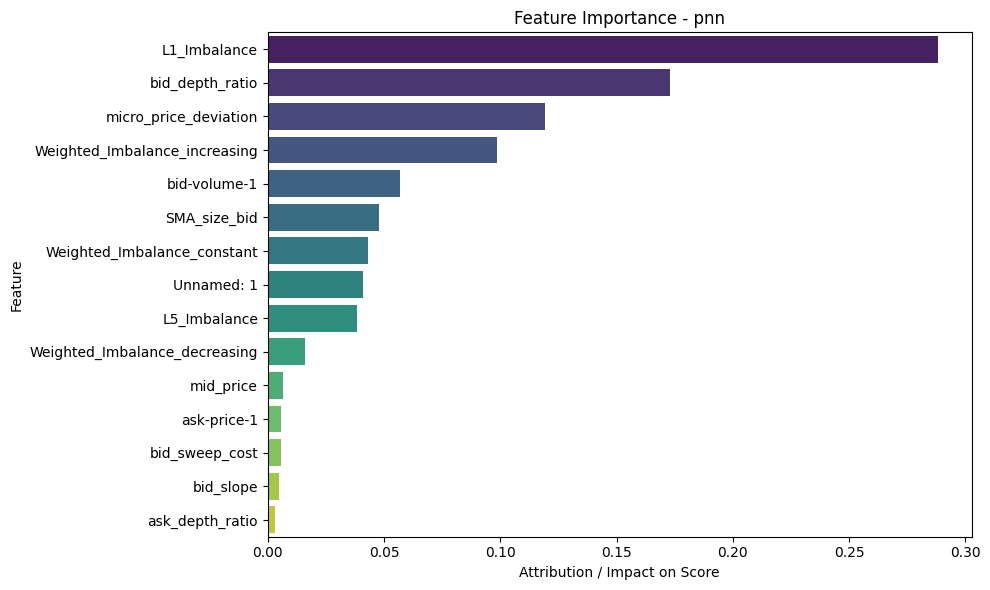

In [17]:
print("Starting Analysis Loop...\n")
for model_name in MODELS_TO_ANALYZE:
    print("="*60)
    print(f"Analyzing Model: {model_name}")
    print("="*60)
    
    # CONFIG & SETUP
    config_path = f"{MODEL_DIR}/{DATASET}_{SCALER}_{model_name}_sequential_config.json"
    weights_path = f"{MODEL_DIR}/{DATASET}_{SCALER}_{model_name}_sequential_weights.pth"
        
    with open(config_path, 'r') as f: config = json.load(f)
    
    # Align features
    data_pipeline.feature_names = config['feature_names']
    # Patch input_dim
    if 'input_dim' not in config: config['input_dim'] = len(config['feature_names'])
        
    # Filter DF columns
    current_df = base_features[config['feature_names']]
    
    # Load Scaler
    scaler_path = f"{MODEL_DIR}/{DATASET}_{SCALER}_transformer_ocsvm_sequential_scaler.pkl"
    scaler = joblib.load(scaler_path)
    test_scaled = scaler.transform(current_df.values)
    
    # Load Model
    dummy_input = pd.DataFrame(test_scaled[:100], columns=config['feature_names'])
    mp, _ = load_model(config_path, dummy_input, config['feature_names'])
    
    state_dict = torch.load(weights_path, map_location=device)
    if 'mu' in state_dict: del state_dict['mu']
    mp.model.load_state_dict(state_dict, strict=False)
    mp.model.eval()
    
    # Load OC-SVM
    if 'transformer_ocsvm' in model_name:
        detector_path = f"{MODEL_DIR}/{DATASET}_{SCALER}_{model_name}_sequential_ocsvm_detector.pkl"
        mp.detector = joblib.load(detector_path)

    # Detect top anomalies
    # Create DataLoader
    dataset = LazySequenceDataset(test_scaled, SEQ_LENGTH)
    loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)
    mp.X_test = dataset

    scores = []
    with torch.no_grad():
        for batch_x, _ in loader:
            batch_x = batch_x.to(device)
            
            if 'pnn' in model_name:
                batch_flat = batch_x.view(batch_x.size(0), -1)
                output = mp.model(batch_flat)
                mu, sigma, alpha = output
                scores.extend(sigma.flatten().cpu().numpy())
            
            elif 'transformer_ocsvm' in model_name:
                # Reconstruction Error + OC-SVM Score
                latent = mp.model.encoder(batch_x)
                latent_np = latent.cpu().numpy()
                ocsvm_scores = -mp.detector.decision_function(latent_np)
                scores.extend(ocsvm_scores)
            
            elif 'prae' in model_name:
                output = mp.model(batch_x)
                rec = output[0] if isinstance(output, tuple) else output
                err = torch.mean((batch_x - rec)**2, dim=[1,2])
                scores.extend(err.cpu().numpy())
                
    scores = np.array(scores)
    top_n_indices = np.argsort(scores)[-TOP_N:][::-1]
    print(f"Examining Top {TOP_N} Anomalies.")
    print(f"Score Range: {scores[top_n_indices[-1]]:.4f} - {scores[top_n_indices[0]]:.4f}")

    # Sensitivity Analysis - Aggregate over Top N
    aggregate_importance = np.zeros(len(mp.feature_names))
    
    # For grouped occlusion
    grouped_results = {group_by: {'importance': None, 'feature_lists': None} for group_by in GROUP_BY_OPTIONS}

    for i, idx in enumerate(top_n_indices):
        # input sequence for anomaly
        input_seq, _ = mp.X_test[idx]
        input_seq = input_seq.unsqueeze(0).to(device)
        input_seq.requires_grad = True

        current_importance = None

        if model_name == 'transformer_ocsvm':
            # Individual Feature Occlusion
            print(f"Anomaly {i+1}/{TOP_N}: Feature Occlusion")
            importance_df = ml.explain_occlusion(
                mp, 
                input_seq, 
                config['feature_names'], 
                baseline_mode='mean'
            )

            occ_df = importance_df.set_index('Feature').reindex(config['feature_names'])
            current_importance = occ_df['Importance'].fillna(0).values
            
            # Grouped Feature Occlusion
            if USE_GROUPED_OCCLUSION:
                for group_by in GROUP_BY_OPTIONS:
                    group_df, feature_lists = ml.explain_grouped_occlusion(
                        mp, 
                        input_seq, 
                        config['feature_names'], 
                        group_by=group_by,
                        baseline_mode='mean'
                    )
                    
                    if grouped_results[group_by]['importance'] is None:
                        grouped_results[group_by]['importance'] = group_df.set_index('Group')['Importance'].to_dict()
                        grouped_results[group_by]['feature_lists'] = feature_lists

                    else:
                        for group_name in group_df['Group']:
                            grouped_results[group_by]['importance'][group_name] = \
                                grouped_results[group_by]['importance'].get(group_name, 0) + group_df.set_index('Group').loc[group_name, 'Importance']

        else:
            print(f"Anomaly {i+1}/{TOP_N}: Integrated Gradients")
            if 'pnn' in model_name:
                model_to_explain = FlattenWrapper(mp.model)

                # Target function: Maximize sigma
                target_fn = lambda output, inputs: output[1].sum()

            else: # PRAE
                model_to_explain = mp.model

                # Target function: Maximize Reconstruction Error
                def target_fn(output, inputs):
                    rec = output[0] if isinstance(output, tuple) else output
                    return torch.sum((rec - inputs) ** 2, dim=[1, 2])

            IG = ml.IntegratedGradients(model_to_explain)

            attributions = IG.attribute(input_seq, target_func=target_fn, n_steps=50)
            attrs_np = attributions.detach().cpu().numpy()

            current_importance = np.sum(np.abs(attrs_np[0]), axis=0)
        
        if current_importance is not None:
            current_importance = np.abs(current_importance)
            current_importance = current_importance / (np.sum(current_importance) + 1e-8)
            aggregate_importance += current_importance

    avg_importance = aggregate_importance / TOP_N

    # Visualization - Individual Feature Importance
    ig_df = pd.DataFrame({'Feature': config['feature_names'], 'Importance': avg_importance})
    viz.plot_global_importance(ig_df, title=f"Feature Importance - {model_name}", save_path=f'../results/sensitivity_analysis/figures/{DATASET}_{SCALER}_{model_name}_sequential_feature_importance.png')
    
    # Visualization - Grouped Feature Importance
    if model_name == 'transformer_ocsvm' and USE_GROUPED_OCCLUSION:
        print("Grouped Feature Occlusion Results")
        for group_by in GROUP_BY_OPTIONS:
            # Average importance over TOP_N anomalies
            avg_group_importance = {k: v / TOP_N for k, v in grouped_results[group_by]['importance'].items()}
            
            group_df = pd.DataFrame({
                'Group': list(avg_group_importance.keys()),
                'Importance': list(avg_group_importance.values())
            }).sort_values('Importance', ascending=False)
            
            print(f"Grouped by '{group_by}':")
            print(group_df.to_string(index=False))
            
            # Plot
            plt.figure(figsize=(12, 6))
            colors = plt.cm.viridis(np.linspace(0, 1, len(group_df)))
            bars = plt.barh(group_df['Group'], group_df['Importance'], color=colors)
            plt.xlabel('Importance (Score Drop)')
            plt.ylabel(f'Group ({group_by})')
            plt.title(f'Grouped Feature Importance by {group_by.upper()} - {model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.savefig(f'../results/sensitivity_analysis/figures/{DATASET}_{SCALER}_{model_name}_grouped_{group_by}_importance.png', dpi=150, bbox_inches='tight')
            plt.show()
            
            # Save detailed results to JSON
            results_data = {
                'group_by': group_by,
                'model': model_name,
                'top_n_anomalies': TOP_N,
                'importance': avg_group_importance,
                'feature_lists': grouped_results[group_by]['feature_lists']
            }
            with open(f'../results/sensitivity_analysis/{DATASET}_{SCALER}_{model_name}_grouped_{group_by}_results.json', 'w') as f:
                json.dump(results_data, f, indent=2)
    
    print("\n")